# 미션3_5팀_전수현

### 1. Data 분석 및 preprocessing

이번 과제는 RMSLE라는 특정 Loss를 낮추는 것이다. 지난 과제가 EDA에서 끝났다면 이번 과제는 데이터의 분석과 모델링을 통한 문제 해결을 하는 것이 목표이다.

일단 이번 과제에서 MSE가 아닌 RMSLE라는 특이한 loss를 사용하는데 그건 결과를 보면서 고찰해보면 좋을것 같다. 따라서 먼저 RMSLE를 정의해보았다.

In [1]:
import numpy as np


# 그러나 안정적인 결과를 위해서 싸이킷런의 메서드를 사용
def RMSLE(x, y):
    x = np.asarray(x)
    y = np.asarray(y)

    return np.sqrt(np.mean((np.log(x + 1) - np.log(y + 1)) ** 2))


# RMSLE(model_lr.predict(X_train), Y_train_count)
# model_lr.predict(X_train)
# np.asarray(Y_train_count)

RMSLE는 큰 값보다 **작은 값**의 오차를 더 중요시하는 경우 좋다고 하는데 한번 기존 MSE과 같은 loss랑 비교해보는 것도 의미 있는 과제가 될것 같다


In [2]:
import pandas as pd

train_set = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")

In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


주어진 데이터의 특징은 datetime 빼고 대부분 다루기 수월한 int나 float형 데이터임을 알 수 있었다.

대체적으로 데이터를 살펴보기 위해

In [5]:
train_set.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


해당 데이터는 각 시간단위로 자전거가 몇대씩 빌렸는지 count하고 있었기 때문에 label은 count 칼럼임을 알 수 있다.  

test_set에 해당 컬럼들이 없는것을 보고 다시 한번 확신했다.

In [6]:
# 중복 row 검사
train_set.duplicated().sum()
test_set.duplicated().sum()

# 결측치
train_set.isnull().sum().sort_values(ascending=False)
test_set.isnull().sum().sort_values(ascending=False)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

해당 데이터는 잘 정제된 데이터임을 알 수 있었다.  

이제 모델링을 위한 pre-processing을 진행하면

In [7]:
train_set.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


또한 datetime을 유의미하게 처리하려면 year, month, day, time으로 나눌 필요가 있어 보인다.

In [8]:
train_set["datetime"] = pd.to_datetime(train_set["datetime"])
train_set["datetime"].dtypes

dtype('<M8[ns]')

In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [10]:
train_set["year"] = train_set["datetime"].dt.year
train_set["month"] = train_set["datetime"].dt.month
train_set["day"] = train_set["datetime"].dt.day
train_set["hour"] = train_set["datetime"].dt.hour

test_set["year"] = train_set["datetime"].dt.year
test_set["month"] = train_set["datetime"].dt.month
test_set["day"] = train_set["datetime"].dt.day
test_set["hour"] = train_set["datetime"].dt.hour

In [11]:
train_set.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


이제 각 column의 correlation을 알아보기 위해서 heatmap을 그려보면

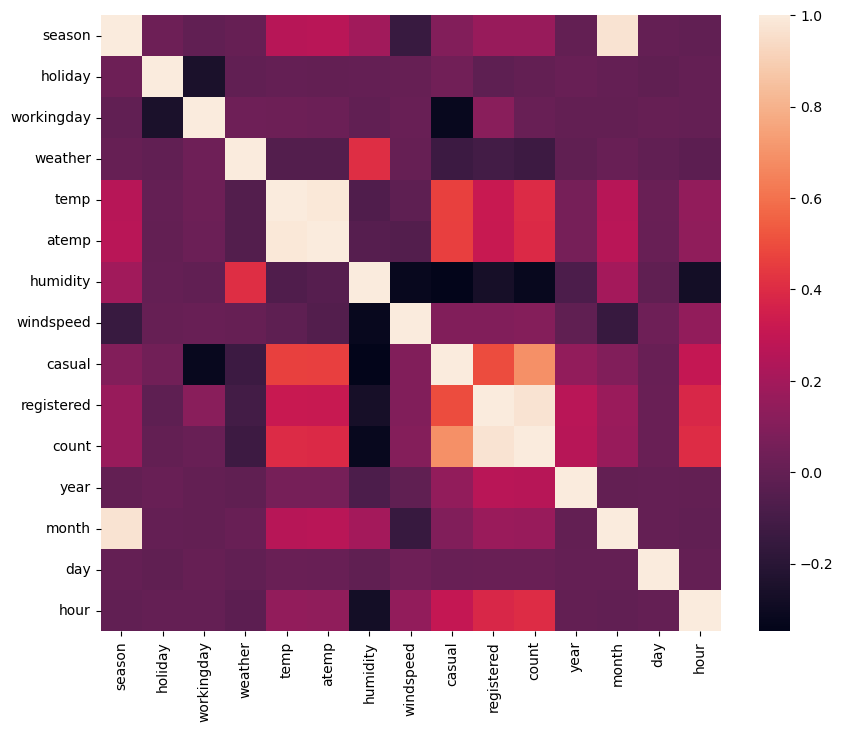

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data=train_set.drop(columns="datetime").corr())
plt.show()

heatmap 결과에서 유추해볼 수 있는 것은 다음과 같다.
1) count와 registered는 correlation이 casual에 비해 높았다. 이것은 회원일수록 더 자전거 이용율이 높다는 뜻.
2) temp(온도) atemp(체감온도)는 거의 특성이 같게 나타났다. 두개를 구분하는 것이 그렇게까지 중요한 일은 아니다.
3) season과 month가 유독 튀는 상관관계가 나타나는데 이건 한번 들여다볼 지점인듯.
4) 또한 day의 경우 모든 변수와 거의 관계가 없음을 볼 수 었다. 날짜에 따른 이용 패턴의 변화는 거의 없을듯.
5) 그리고 종속변수의 경우 count와 registered의 경우 모든 변수에 대해서 비슷한 경향을 보였지만 유일하게 workingday에서 차이가 있었다. 이것의 의미는 평일에 회원들의 자전거 사용 패턴이 높다는 것이다.


이제 target data를 *count*와 *casual*과 *registered* 셋 중에 어느것을 사용하느냐도 분석에 중요한 요소일 수 있다.  

대략적으로 2가지 방식으로 나뉠것 같은데

1) 가장 단순한 방법으로 *count*만 고려하는 방법
2) *registered* 여부에 따른 방법  


으로 생각해볼 수 있다.

일단 전체적인 흐름을 파악하기위해서 *count*를 label로 하는 단순한 방식으로 접근해보았다.

따라서 최종적으로 dataset을 만들어보면 다음과 같다

In [13]:
# Train data set
X_train = train_set.drop(columns=["datetime", "registered", "casual", "count"])

# Label
Y_train_count = train_set["count"]
Y_train_register = train_set["registered"]

Test_set = test_set.drop(columns="datetime")

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   year        10886 non-null  int32  
 9   month       10886 non-null  int32  
 10  day         10886 non-null  int32  
 11  hour        10886 non-null  int32  
dtypes: float64(3), int32(4), int64(5)
memory usage: 850.6 KB


In [15]:
Test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      6493 non-null   int64  
 1   holiday     6493 non-null   int64  
 2   workingday  6493 non-null   int64  
 3   weather     6493 non-null   int64  
 4   temp        6493 non-null   float64
 5   atemp       6493 non-null   float64
 6   humidity    6493 non-null   int64  
 7   windspeed   6493 non-null   float64
 8   year        6493 non-null   int32  
 9   month       6493 non-null   int32  
 10  day         6493 non-null   int32  
 11  hour        6493 non-null   int32  
dtypes: float64(3), int32(4), int64(5)
memory usage: 507.4 KB


### 2. Model Selection

먼저 대표적인 선형회귀 3가지 모델에 대해서 간단하게 학습시키고 결과를 살펴보았다.

In [16]:
# (1) Linear regression
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

model_lr.fit(X_train, Y_train_count)
model_lr.score(X_train, Y_train_count)

0.38930312463366035

과제에서 제시한 RMSLE를 포함한 간단한 evaluation 함수를 정의해보았다.

In [17]:
from sklearn.metrics import *


def eval_train(model, X_train, Y_train):
    score = model.score(X_train, Y_train)
    y_pred = model.predict(X_train)
    RMSE_err = root_mean_squared_error(y_pred, Y_train)
    MAE_err = mean_absolute_error(y_pred, Y_train)
    # MLSE_err = mean_squared_log_error(model.predict(X_train), Y_train)

    print("학습 평가")
    print(f"score   : {score:.5f}")
    print(f"RMSE_err: {RMSE_err:.5f}")
    print(f"MAE_err : {MAE_err:.5f}")
    if (y_pred > -1).all():
        rmsle = root_mean_squared_log_error(y_pred, Y_train)
        print(f"RMSLE_err: {rmsle:.5f}")
    else:
        print(f"RMSLE_err: Nan")

In [18]:
eval_train(model_lr, X_train, Y_train_count)

학습 평가
score   : 0.38930
RMSE_err: 141.55263
MAE_err : 106.17592
RMSLE_err: Nan


학습된 모델의 경우 전체적으로 학습데이터에 대한 학습도 잘 안되는 모습을 볼 수 있었다.  

이제 본격적으로 Test set에 대한 성능을 평가하기 위해 함수 하나를 정의하면

In [19]:
# test set을 *통계적*으로 평가하기 위한 함수 정의
Test_model = list()


def test_model(model, Test_set, log_transformed: bool):

    predictions = model.predict(Test_set)

    if log_transformed == True:
        predictions = np.expm1(predictions)

    # 통계량 계산
    mean_test = predictions.mean()
    std_test = predictions.std()
    max_test = predictions.max()
    min_test = predictions.min()
    median_test = np.median(predictions)

    print("** Test set 결과 **")
    print(f"mean   : {mean_test:.5f}")
    print(f"std    : {std_test:.5f}")
    print(f"max    : {max_test:.5f}")
    print(f"min    : {min_test:.5f}")
    print(f"median : {median_test:.5f}")

    return mean_test, std_test, max_test, min_test, median_test

In [20]:
Test_model.append(test_model(model_lr, Test_set, log_transformed=False))

** Test set 결과 **
mean   : 153.69684
std    : 100.25131
max    : 478.47649
min    : -108.90277
median : 145.69809


일단 특징적으로 볼 수 있는것은 

1) std값이 너무 크다는 것
2) 그리고 결과값이 음수가 나온다는 것

따라서 해당 데이터는 선형 모델로 fitting이 적합하지 않다고 생각할 수 있다. 혹시 regulation을 해서 음수 값을 조금 줄여볼 수 있지 않을까? 해서 Ridge와 Lasso를 한번 실험해보았다.

In [21]:
# (2) Ridge regression
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=10000)

model_ridge.fit(X_train, Y_train_count)
eval_train(model_ridge, X_train, Y_train_count)

학습 평가
score   : 0.35686
RMSE_err: 145.26415
MAE_err : 107.17869
RMSLE_err: Nan


In [22]:
Test_model.append(test_model(model_ridge, Test_set, log_transformed=False))

** Test set 결과 **
mean   : 178.01165
std    : 100.38219
max    : 505.65143
min    : -76.29944
median : 165.69395


In [23]:
# (3) Lasso regression
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=10, max_iter=1000)

model_lasso.fit(X_train, Y_train_count)
eval_train(model_lasso, X_train, Y_train_count)

학습 평가
score   : 0.37608
RMSE_err: 143.07747
MAE_err : 105.93304
RMSLE_err: Nan


In [24]:
Test_model.append(test_model(model_lasso, Test_set, log_transformed=False))

** Test set 결과 **
mean   : 169.76771
std    : 97.65147
max    : 487.95126
min    : -82.75898
median : 159.79501


대표적인 선형 모델 3가지에 대해서 score 값과 테스트데이터 prediction을 해보았지만 모든 모델이 underfitting되는 현상이 나타나고 있다. 따라서 지금 해볼 수 있는 문제는
1) data 전처리를 통해서 학습 능력을 더 끌어올리는 것
2) 더 복잡한 모델, 예를 들면 polynomial,을 사용하는 것.  

일단 모델의 복잡도를 올려서 더 다양한 모델에 학습을 시켜보겠다.

In [25]:
# polynomial 2차 모델
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X2 = poly.fit_transform(X_train)
TEST_2 = poly.fit_transform(Test_set)

model_poly = LinearRegression()

model_poly.fit(X2, Y_train_count)
eval_train(model_poly, X2, Y_train_count)

학습 평가
score   : 0.55479
RMSE_err: 120.86122
MAE_err : 90.65990
RMSLE_err: Nan


In [26]:
Test_model.append(test_model(model_poly, TEST_2, log_transformed=False))

** Test set 결과 **
mean   : 128.00877
std    : 119.12968
max    : 552.92737
min    : -282.45103
median : 134.28657


In [27]:
# polynomial 3차 모델
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X3 = poly.fit_transform(X_train)
TEST_3 = poly.fit_transform(Test_set)

model_poly = LinearRegression()

model_poly.fit(X3, Y_train_count)
eval_train(model_poly, X3, Y_train_count)

학습 평가
score   : 0.64861
RMSE_err: 107.37392
MAE_err : 76.44132
RMSLE_err: Nan


In [28]:
Test_model.append(test_model(model_poly, TEST_3, log_transformed=False))

** Test set 결과 **
mean   : 126.71702
std    : 454.95047
max    : 3564.28027
min    : -4051.85525
median : 131.66761


poly 모델의 경우 차수를 높이면 성능이 좋아지는 것으로 보아 비선형 모델이 적합하다는 결론을 내릴 수 있었다.  

따라서 지금 회귀 모델에서 비선형으로 많이 쓰이는 `RandomForestRegressor`와 `GradientBoostingRegressor`으로 학습을 해보겠다.

In [29]:
# 앙상블 트리 모델
from sklearn.ensemble import RandomForestRegressor

model_Ens = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
model_Ens.fit(X_train, Y_train_count)
eval_train(model_Ens, X_train, Y_train_count)

학습 평가
score   : 0.99245
RMSE_err: 15.74193
MAE_err : 9.75972
RMSLE_err: 0.15400


In [30]:
Test_model.append(test_model(model_Ens, Test_set, log_transformed=False))

** Test set 결과 **
mean   : 151.66683
std    : 125.22628
max    : 656.21000
min    : 1.28000
median : 128.65000


In [31]:
# 부스팅 기반 고성능 모델
from sklearn.ensemble import GradientBoostingRegressor

model_Boost = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=100, random_state=42
)
model_Boost.fit(X_train, Y_train_count)
eval_train(model_Boost, X_train, Y_train_count)

학습 평가
score   : 1.00000
RMSE_err: 0.00481
MAE_err : 0.00379
RMSLE_err: 0.00041


In [32]:
Test_model.append(test_model(model_Boost, Test_set, log_transformed=False))

** Test set 결과 **
mean   : 150.35557
std    : 131.64004
max    : 717.20513
min    : 1.00506
median : 121.88262


머신러닝에서 기본적인 모델링에 대한 실험의 결과 각 모델마다 성능의 추이를 확인할 수 있었다. 앙상블 트리모델과 부스팅 기반 고성능 모델의 경우 매우 좋은 성능을 보였고 나머지 모델은 음수값을 test 결과 음수값을 예측하는 것으로 보아 적합하지 않은 데이터라고 생각할 수 있다.

그리고 결과값을 살펴보다가 문제를 발견했는데 이 과제의 목표가 `RMSLE`를 최소화하는 것이 목표였기 때문에 이 부분에 조금 더 집중하기로 했다.  

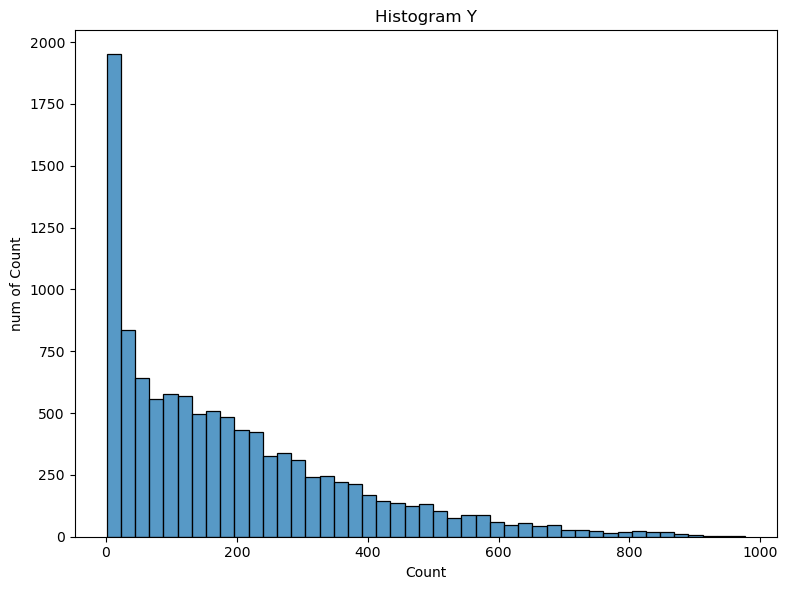

In [33]:
# Trainset의 label 데이터의 분포를 알아보기 위해서

plt.figure(figsize=(8, 6))
sns.histplot(Y_train_count)

plt.title("Histogram Y")
plt.xlabel("Count")
plt.ylabel("num of Count")
plt.tight_layout()
plt.show()

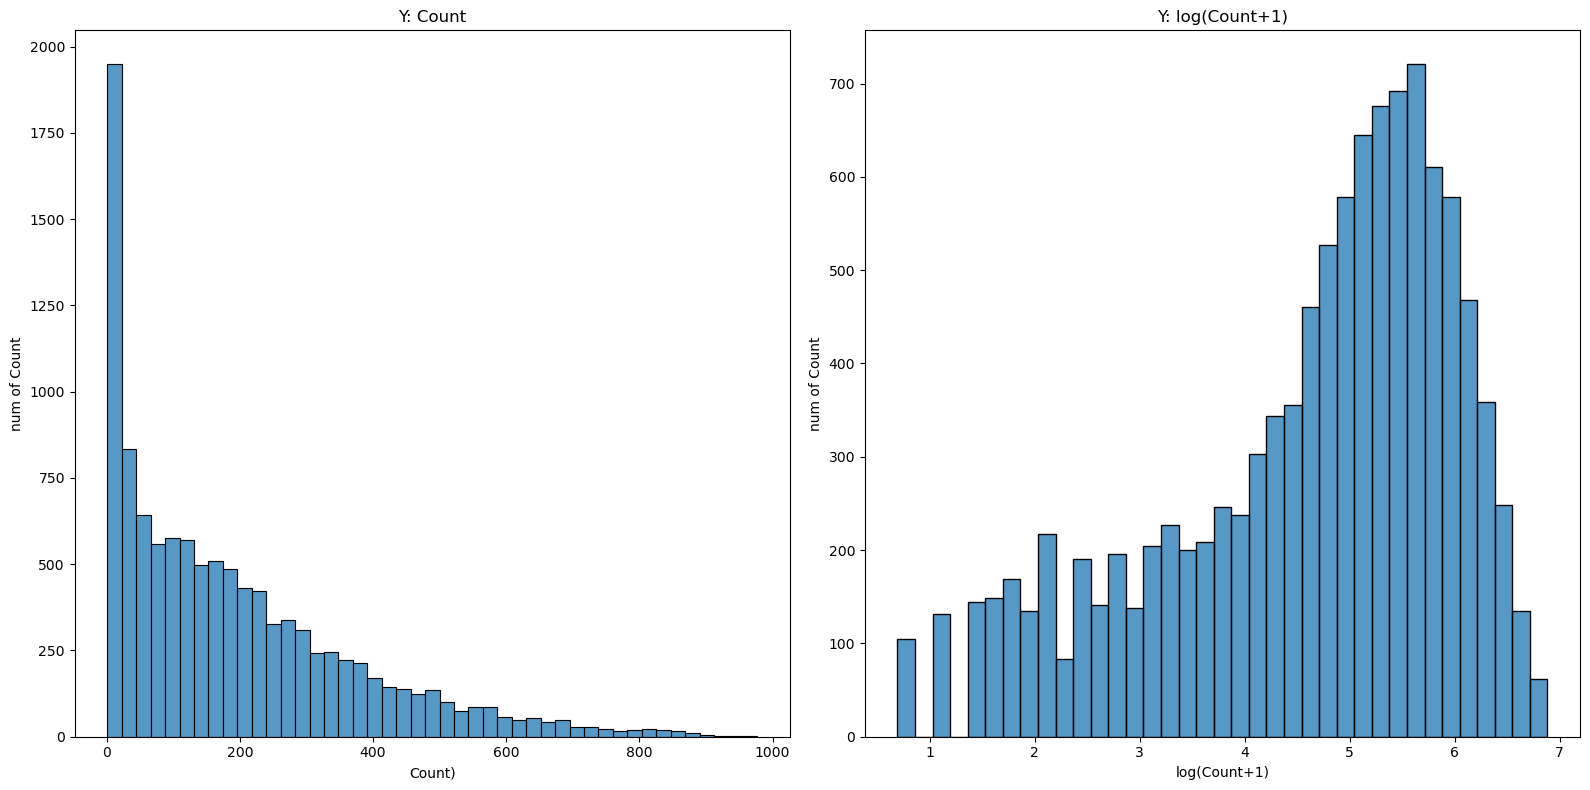

In [34]:
# Trainset의 label 데이터의 분포를 알아보기 위해서

# 원래 Y label 데이터
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.histplot(Y_train_count)

plt.title("Y: Count")
plt.xlabel("Count)")
plt.ylabel("num of Count")

# log_transformed(오른쪽쪽)
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(Y_train_count))

plt.title("Y: log(Count+1)")
plt.xlabel("log(Count+1)")
plt.ylabel("num of Count")
plt.tight_layout()
plt.show()

오른쪽의 np.log1p()의 결과 학습데이터의 분포가 훨씬 고르게 분포함을 볼 수 있었다. 학습 결과도 살펴보면

In [35]:
# log(y+1)으로 전환
log_Y_train = np.log1p(Y_train_count)

model_lr = LinearRegression()


model_lr.fit(X_train, log_Y_train)
eval_train(model_lr, X_train, log_Y_train)

학습 평가
score   : 0.48733
RMSE_err: 1.01629
MAE_err : 0.80024
RMSLE_err: 0.23135


In [36]:
Test_model.append(test_model(model_lr, Test_set, log_transformed=True))

** Test set 결과 **
mean   : 122.63038
std    : 142.33983
max    : 1279.62102
min    : 6.96550
median : 71.89648


In [37]:
# (2) Ridge regression
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=100)

model_ridge.fit(X_train, log_Y_train)
eval_train(model_ridge, X_train, log_Y_train)

학습 평가
score   : 0.48730
RMSE_err: 1.01633
MAE_err : 0.80025
RMSLE_err: 0.23138


In [38]:
Test_model.append(test_model(model_ridge, Test_set, log_transformed=True))

** Test set 결과 **
mean   : 123.26082
std    : 142.47252
max    : 1283.47362
min    : 7.00848
median : 72.32002


log_transform된 데이터셋으로 학습한 결과는 놀랍게도 linear 모델에서도 충분히 동작할 수 있을만큼 성능이 나온다는 것이다.  

위에서 결과는 아예 음수값을 예측해버리는 틀린 prediction을 했지만 log_transformed 결과는 합리적인 범위 내에서 모델이 prediction을 하는 것을 볼 수 있었다.

**결과적으로** 학습데이터에 log_transform을 적용시키는 것은 합리적인 판단이라는 것이다.

## 3. 파라미터 튜닝 및 최적화

학습데이터 처리, 여러 모델링 결과를 확인했고 이제 최적의 결과값을 위해서 모델 튜닝을 진행해보았다.

### (1) train_test_split 적용

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X_train, Y_train_count, test_size=0.2, random_state=100
)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


model_lr_2 = LinearRegression()

model_lr_2.fit(x_train, y_train_log)
eval_train(model_lr_2, x_test, y_test_log)

학습 평가
score   : 0.51140
RMSE_err: 1.00934
MAE_err : 0.79868
RMSLE_err: 0.23557


In [40]:
Test_model.append(test_model(model_lr_2, Test_set, log_transformed=True))

** Test set 결과 **
mean   : 122.73384
std    : 141.33534
max    : 1270.69176
min    : 7.12984
median : 72.68846


train-test split을 적용하면 어느정도 성능 향상을 확인할 수 있었기 때문에 computing power가 가장 많이 소모되는 `GridSearchCV`를 사용하여 튜닝을 진행해보겠다.

In [41]:
from sklearn.model_selection import GridSearchCV

rmsle_scorer = make_scorer(root_mean_squared_log_error, greater_is_better=False)


models_and_params = {
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {"fit_intercept": [True, False]},
    },
    "Ridge": {
        "model": Ridge(),
        "params": {
            "alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            "fit_intercept": [True, False],
            "solver": ["auto", "svd", "cholesky", "lsqr"],
        },
    },
    "Lasso": {
        "model": Lasso(max_iter=10000),
        "params": {
            "alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            "fit_intercept": [True, False],
            "selection": ["cyclic", "random"],
        },
    },
    "RandomForestRegressor": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "bootstrap": [True, False],
        },
    },
    "GradientBoostingRegressor": {
        "model": GradientBoostingRegressor(),
        "params": {
            "n_estimators": [100, 200, 300],
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [3, 5, 7],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "subsample": [0.8, 1.0],
        },
    },
}

results = {}

for name, mp in models_and_params.items():
    print(f"\n** Model name: {name}")

    grid = GridSearchCV(
        estimator=mp["model"],
        param_grid=mp["params"],
        cv=8,
        scoring=rmsle_scorer,  # RMSLE 기준으로 최적화
        n_jobs=6,
        verbose=0,
    )

    grid.fit(X_train, log_Y_train)  # log_transformed 데이터

    print("Best Params :", grid.best_params_)
    print("Best RMSLE  :", -grid.best_score_)  # 음수로 계산되므로 양수로 출력

    results[name] = {
        "best_estimator": grid.best_estimator_,
        "best_params": grid.best_params_,
        "best_score": -grid.best_score_,
    }


** Model name: LinearRegression
Best Params : {'fit_intercept': True}
Best RMSLE  : 0.2324691509958099

** Model name: Ridge
Best Params : {'alpha': 0.001, 'fit_intercept': True, 'solver': 'svd'}
Best RMSLE  : 0.23246915131182772

** Model name: Lasso
Best Params : {'alpha': 0.001, 'fit_intercept': True, 'selection': 'random'}
Best RMSLE  : 0.232473057743514

** Model name: RandomForestRegressor


/home/soohyun/ls/envs/JSH/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Params : {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best RMSLE  : 0.10760170096106937

** Model name: GradientBoostingRegressor
Best Params : {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.8}
Best RMSLE  : 0.09189330306463472


In [42]:
results

{'LinearRegression': {'best_estimator': LinearRegression(),
  'best_params': {'fit_intercept': True},
  'best_score': np.float64(0.2324691509958099)},
 'Ridge': {'best_estimator': Ridge(alpha=0.001, solver='svd'),
  'best_params': {'alpha': 0.001, 'fit_intercept': True, 'solver': 'svd'},
  'best_score': np.float64(0.23246915131182772)},
 'Lasso': {'best_estimator': Lasso(alpha=0.001, max_iter=10000, selection='random'),
  'best_params': {'alpha': 0.001,
   'fit_intercept': True,
   'selection': 'random'},
  'best_score': np.float64(0.232473057743514)},
 'RandomForestRegressor': {'best_estimator': RandomForestRegressor(max_depth=30, min_samples_leaf=2, n_estimators=300,
                        random_state=42),
  'best_params': {'bootstrap': True,
   'max_depth': 30,
   'min_samples_leaf': 2,
   'min_samples_split': 2,
   'n_estimators': 300},
  'best_score': np.float64(0.10760170096106937)},
 'GradientBoostingRegressor': {'best_estimator': GradientBoostingRegressor(min_samples_split=5,

## Conclusion & Discussion
1) 데이터 처리 기법: 주어진 데이터를 log_transformed 기법을 통해 정규화시켜 학습을 시켜 RMSLE 성능을 향상
2) 적절한 회귀 모델을 찾기 위해 하이퍼파라미터 튜닝을 grid search를 통해 찾고 비교함
3) 결과적으로 RMSLE 성능은 부스팅 모델과 앙상블 모델이 좋게 나왔지만 overfitting에 대한 위험성이 높다. 따라서 해당 모델의 예측을 100% 신뢰하면 안됨.
4) linear한 모델의 예측력이 부스팅과 앙상블 모델보다 낮게 나왔지만 오히려 regularization을 통해서 overfitting을 방지하는 모델이 더 실제 상황에서는 유용할 수 있다.
5) 또한 label로 사용된 count를 registered와 casual로 나누어 분석함으로써 더 심도깊은 결과를 만들어낼 수 있을것으로 보임.